# BART Ridership Trends

Original Data source: https://www.bart.gov/about/reports/ridership 

The data files were renamed using a bash script to have a consistant naming structure.
Our organized data can be found here: https://drive.google.com/file/d/1oyeogOoE0rTLDQHEl5MlA2n_CEFPMmAf/view?usp=sharing
please download it and extract it in the project directory

Presentation can be found here :
https://docs.google.com/presentation/d/11_VulfOK9_WXmfGw7WL3Es_syKoNeFQ49CYrz1RQDKg/edit#slide=id.g4862b3f9db_3_32

In [1]:
%matplotlib inline 

#### Read and clean up data

In [2]:
from SupportCode.data_loader import *

In [3]:
df=monthly_data_loader('Data/',verbose=False)

#### Monthly Variation of ridership

In [4]:
from SupportCode.Plots.monthly_bar import *

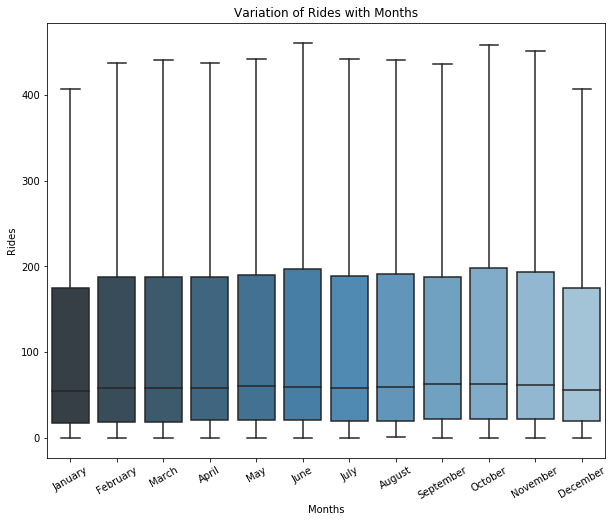

In [5]:
monthly_variation_box(df)

#### Weekly Variation of ridership

In [6]:
data=hourly_data_loader('Data',2017)

In [7]:
from SupportCode.Plots.weekly_bar import *

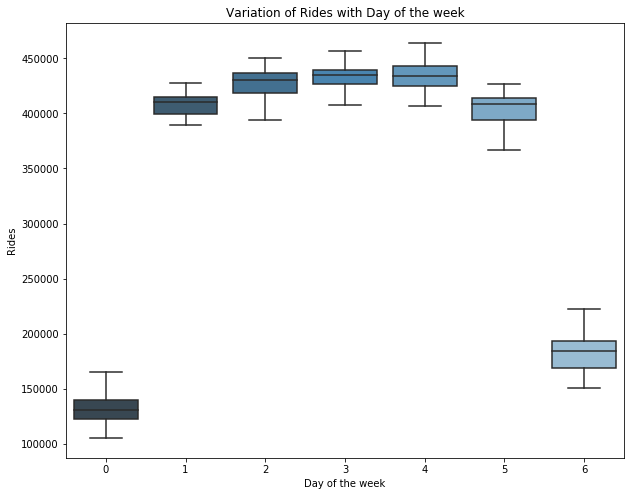

In [8]:
weekly_variation_box(data)

#### Heatmap
The heatmap helps to clearly classify stations as "Residential" or "Commercial" based on the time they have the most departures. 

In [20]:
from SupportCode.plot_folium_heat_maps import plot_heatmap,gen_hrly_df

day = 22
month = 8
year=2018

ride_filename ='Data/HourlyRidership/date-hour-soo-dest-2018.csv' #complete file path

stations = ['RICH','DELN','PLZA','NBRK','DBRK','ASHB','MCAR','19TH','12TH','LAKE',
            'FTVL','COLS','SANL','BAYF','HAYW','SHAY','UCTY','FRMT','CONC','PHIL','WCRK','LAFY',
            'ORIN','ROCK','WOAK','EMBR','MONT','POWL','CIVC','16TH','24TH','GLEN','BALB',
            'DALY','COLM','CAST','DUBL','NCON','PITT','SSAN','SBRN','SFIA','MLBR','WDUB',
            'OAKL']
# removed'WARM','ANTC','PCTR' since they are the newest stations with no data

In [21]:
df = gen_hrly_df(day,month,year,ride_filename,stations)

In [23]:
plot_heatmap(day, month, year,stations,df) #opens a html file in a separate tab

#### Map
If you generate maps for all hours of the day (0-23), we can see the 
flow of traffic throughout the day. The gif was made by generating all hours and using photoshop to label and animate the maps

In [4]:
from plot_folium_heat_maps import plot_map
import folium 

hour = 9

stn_filename ='Data/Station_Names.xls' #complete filepath

In [5]:
bart_map = plot_map(hour, day, month, year,stations,stn_filename,ride_filename)
bart_map

#### Variation of annual exits
Plot a line chart to show the variation of the annual exits from 1973 to 2018

In [11]:
from SupportCode.plot_and_process_data import plotAnnaulExits

filename = r'Data/BART_Ridership_FY73_FY18.xlsx' #fix the file path

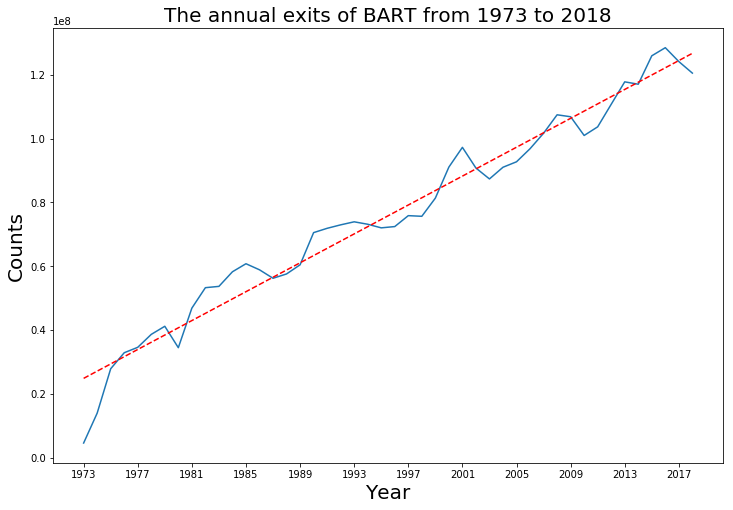

In [12]:
plotAnnaulExits(filename)

#### Difference between weekday and weekends for overall usage
Plot a line chart to show the variation of the average exits of weekday and weekends from 1973 to 2018

In [14]:
from SupportCode.plot_and_process_data import growthOfWeekdayAndWeekend

filename = r'Data/BART_Ridership_FY73_FY18.xlsx' #fix the file path

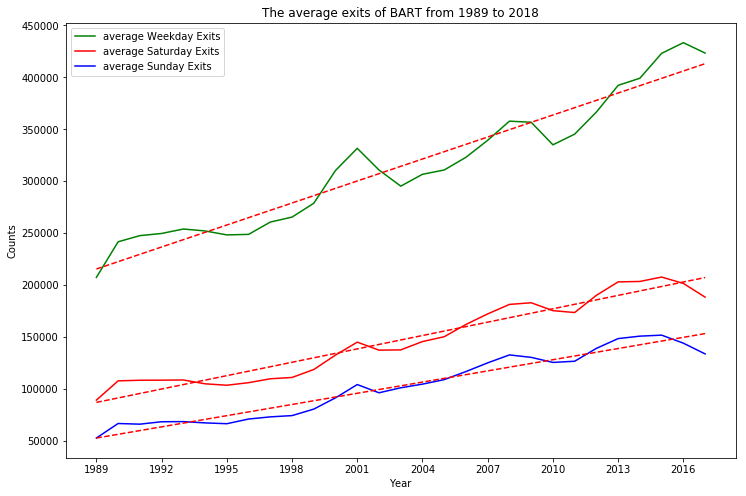

In [15]:
growthOfWeekdayAndWeekend(filename)

#### Extract data of individual station


In [18]:
from SupportCode.plot_and_process_data import extractDataOfEachStation

path = r'Data/' #fix the file path
doorList=['Entries', 'Exits']
stnList = ['RM', 'EN', 'EP', 'NB', 'BK', 'AS', 'MA', 19, 12, 'LM', 'FV', 'CL', 
       'SL', 'BF', 'HY', 'SH', 'UC', 'FM', 'CN', 'PH', 'WC', 'LF', 'OR', 'RR',
       'OW','EM', 'MT', 'PL', 'CC', 16, 24, 'GP', 'BP', 'DC', 'CM', 'CV', 'ED',
       'NC','WP','SS', 'SB', 'SO', 'MB', 'WD', 'OA', 'WS','AN','PC']

stn = 'MB'
door = doorList[1]

In [20]:
for door in doorList:
    for stn in stnList:
        extractDataOfEachStation(path, stn, door)
        print(stn,door)

#### Difference between weekday and weekends for individual station
Plot a line chart to show the variation of the average exits or entries of weekday and weekends for individual station from 1973 to 2018

In [22]:
from SupportCode.plot_and_process_data import plotWeekendVsWeekdayOf

stnList = ['RM', 'EN', 'EP', 'NB', 'BK', 'AS', 'MA', 19, 12, 'LM', 'FV', 'CL', 
       'SL', 'BF', 'HY', 'SH', 'UC', 'FM', 'CN', 'PH', 'WC', 'LF', 'OR', 'RR',
       'EM', 'MT', 'PL', 'CC', 16, 24, 'GP', 'BP', 'DC', 'CM', 'CV', 'ED',
       'WP','SS', 'SB', 'SO', 'MB', 'WD', 'OA', 'WS']


path = r'Data/' #fix the file path
stn = 'MB'
door = 'Exits'

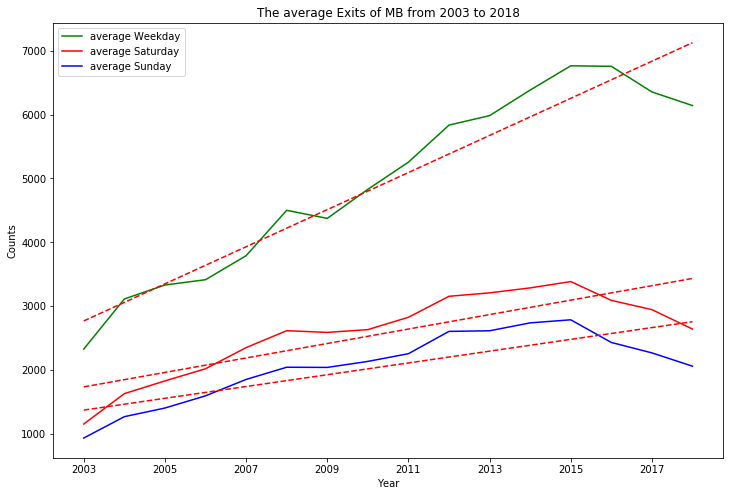

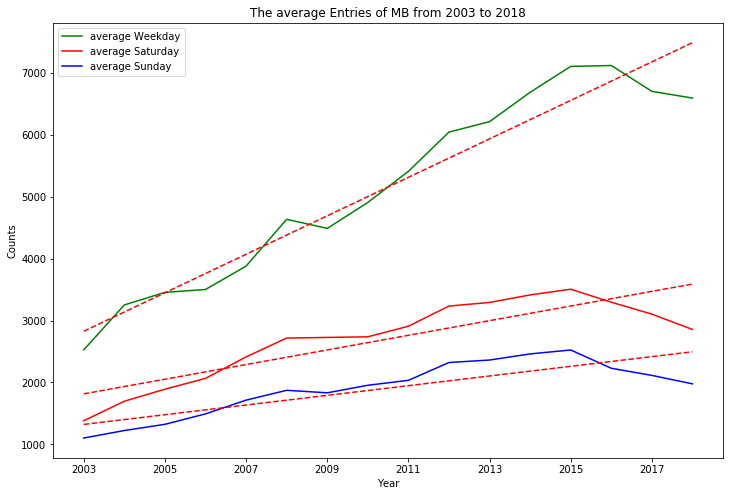

In [23]:
plotWeekendVsWeekdayOf(path, stn, door)
plotWeekendVsWeekdayOf(path, stn, )

#### FolioMap
plot FolioMap of specific year and door
If you generate maps from 2001 to 2018, we can see the change of traffic throughout the 18 years. The gif was made by generating specific year and using gifmaker to label and animate the maps

In [10]:
from SupportCode.plot_and_process_data import plotUsageOfFolioMap

doorList=['Entries', 'Exits']
path = r'Data/' #fix the file path
year = 2002
door = doorList[1]

In [12]:
for year in range(2001,2019):
    fmap = plotUsageOfFolioMap(path, year, door)
    display(fmap)

#### Pie Charts 
showing the distribution of trafic



In [24]:
from SupportCode.Plots.pi_station import *

In [25]:
create_pi_station_distribution(year=2017,day='Weekday') 

Processing file 1/12
Processing file 2/12
Processing file 3/12
Processing file 4/12
Processing file 5/12
Processing file 6/12
Processing file 7/12
Processing file 8/12
Processing file 9/12
Processing file 10/12
Processing file 11/12
Processing file 12/12
phantomjs version: 2.1.1

Generating file ...
File saved in Results/station_traffic_Weekday_2017.png


#### output is rendered and saved in the above specified locaiton please see the results there

#### Sankey Diagram
showing 2018-08-22 main stations traffic flow

In [5]:
from SupportCode.sankey import create_sankey_traffic_flow

In [2]:
filename = 'Data/HourlyRidership/date-hour-soo-dest-2018.csv'#fix the file path
create_sankey_traffic_flow(filename)

SankeyWidget(links=[{'source': 'EMBR', 'target': 'DUBL', 'value': 2374, 'color': 'grey'}, {'source': 'EMBR', '…

#### Station Trends 

In [4]:
from SupportCode.Plots.Station_percent_trend import *

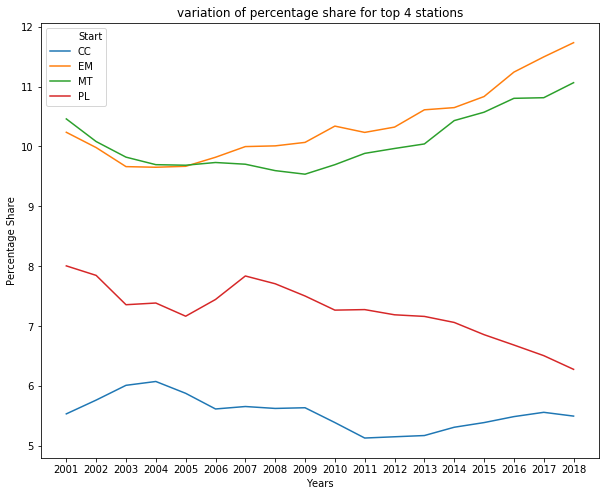

In [5]:
plot_station_percent_share(df)

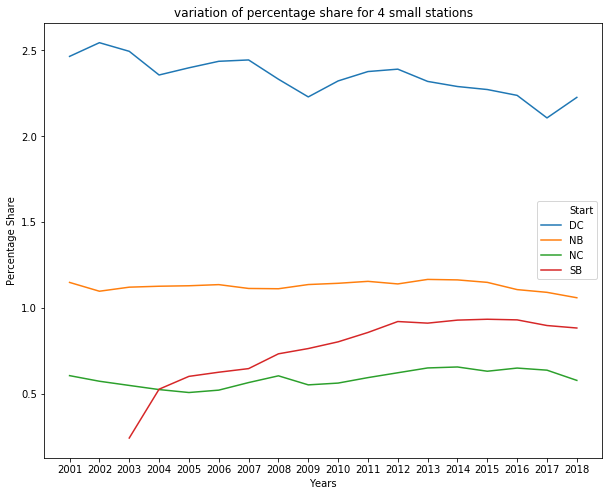

In [6]:
plot_station_percent_share(df,size='small')